In [20]:
# First import libraries for the Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Next import the libraries for the random forest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import RFE
import xgboost as xgb



For the DTSA 5509 final project we are asked to find a data set and develop some sort of question or problem that we are looking to solve using machine learning. For my project I am beginning with a data set I found on Kaggle that was created synthetically by Rabie El Kharoua (Kharoua 2024). The data set is designed to enable students to practice creating various classification models using data crafted to mimic various metrics and attributes of the manufacturing process. This essentially allows us to mimic the function of attempting to find defects in the manufacturing process and identify what attributes and features play the most important role and what features might not be useful and can be cut from the process. The target variable for this is noted by the datasets authour as Defect Status, which is Binary, and either 'Low Defects' or 'High Defects'.

One of the reasons this is so important is not only the very obvious bonuses of being able to live predict defects and make adjustments at a much more rapid and targeted rate, but you can find what areas impact defects the most, and trim those processes that focus on the areas that do not impact this as much. Processes for tracking and analyzing data in a real world manufacturing setting costs both time and money. 

With this in mind my project aims to answer: Is it possible to utilize Machine Learning techniques to predict defects in a manufacturing setting, and leverage the tools available to  spot if there are features we track that we can ultimately trim?




In [21]:
# Upload the data 
mf_df = pd.read_csv('manufacturing_defect_dataset.csv')

In [22]:
mf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float64
 15  AdditiveMaterialCost 

In [23]:
null_counts = mf_df.isnull().sum()
print(null_counts)

ProductionVolume        0
ProductionCost          0
SupplierQuality         0
DeliveryDelay           0
DefectRate              0
QualityScore            0
MaintenanceHours        0
DowntimePercentage      0
InventoryTurnover       0
StockoutRate            0
WorkerProductivity      0
SafetyIncidents         0
EnergyConsumption       0
EnergyEfficiency        0
AdditiveProcessTime     0
AdditiveMaterialCost    0
DefectStatus            0
dtype: int64


In [24]:
mf_df.describe()

ProductionVolume  ProductionCost  SupplierQuality  DeliveryDelay  \
count       3240.000000     3240.000000      3240.000000    3240.000000   
mean         548.523148    12423.018476        89.833290       2.558951   
std          262.402073     4308.051904         5.759143       1.705804   
min          100.000000     5000.174521        80.004820       0.000000   
25%          322.000000     8728.829280        84.869219       1.000000   
50%          549.000000    12405.204656        89.704861       3.000000   
75%          775.250000    16124.462428        94.789936       4.000000   
max          999.000000    19993.365549        99.989214       5.000000   

        DefectRate  QualityScore  MaintenanceHours  DowntimePercentage  \
count  3240.000000   3240.000000       3240.000000         3240.000000   
mean      2.749116     80.134272         11.476543            2.501373   
std       1.310154     11.611750          6.872684            1.443684   
min       0.500710     60.010098          0.000000            0.001665   
25%       1.598033     70.103420          5.750000            1.264597   
50%       2.708775     80.265312         12.000000            2.465151   
75%       3.904533     90.353822         17.000000            3.774861   
max       4.998529     99.996993         23.000000            4.997591   

       InventoryTurnover  StockoutRate  WorkerProductivity  SafetyIncidents  \
count        3240.000000   3240.000000         3240.000000      3240.000000   
mean            6.019662      0.050878           90.040115         4.591667   
std             2.329791      0.028797            5.723600         2.896313   
min             2.001611      0.000002           80.004960         0.000000   
25%             3.983249      0.026200           85.180203         2.000000   
50%             6.022389      0.051837           90.125743         5.000000   
75%             8.050222      0.075473           95.050838         7.000000   
max             9.998577      0.099997           99.996786         9.000000   

       EnergyConsumption  EnergyEfficiency  AdditiveProcessTime  \
count        3240.000000       3240.000000          3240.000000   
mean         2988.494453          0.299776             5.472098   
std          1153.420820          0.116400             2.598212   
min          1000.720156          0.100238             1.000151   
25%          1988.140273          0.200502             3.228507   
50%          2996.822301          0.297470             5.437134   
75%          3984.788299          0.402659             7.741006   
max          4997.074741          0.499500             9.999749   

       AdditiveMaterialCost  DefectStatus  
count           3240.000000   3240.000000  
mean             299.515479      0.840432  
std              116.379905      0.366261  
min              100.211137      0.000000  
25%              194.922058      1.000000  
50%              299.728918      1.000000  
75%              403.178283      1.000000  
max              499.982782      1.000000

At this point we are lucky in that we were quickly able to remove the NA's and none of our data types seem out of range. 

*Saving this data for later to train out new sythetic data model.

<Axes: >

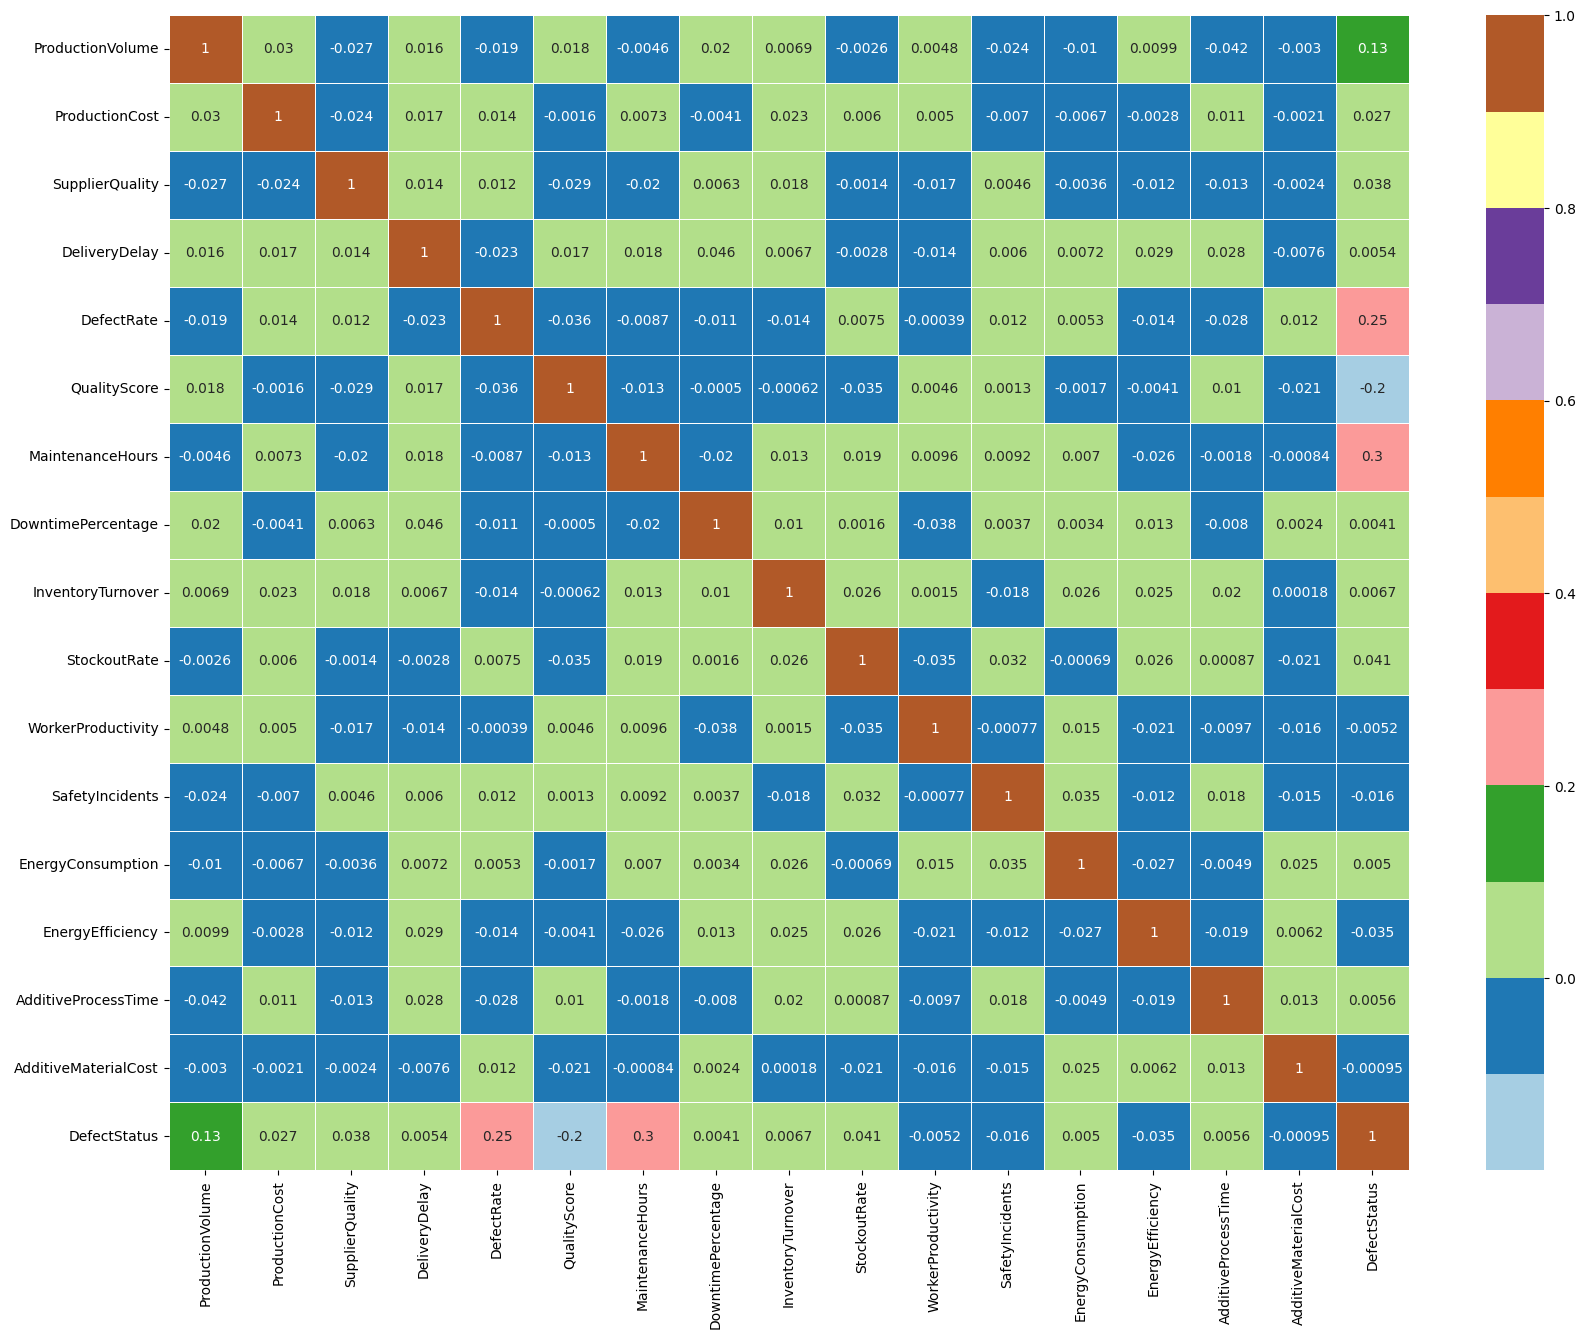

In [25]:
df_corr = mf_df.corr()

plt.subplots(figsize=(20,15))
sns.heatmap(df_corr, linewidth=.5, cmap= "Paired", annot = True)

With this we can see a relatively mild spread in correlation across the board except for 4 instances. 
DefectsStatus vs productionVolume have a weak correlation at 0.012
DefectsStatus vs QualityScore came in with a -0.2
DefectsStatus vs defectsRate naturally has a stronger correlation at 0.25
And lastly DefectsStatus vs maintenanceHours was even higher at 0.30

Next we will check out a pair plot to see if we can learn anything else with this visualization technique. 
As Defect Status is a binary feature rather than including it in the pair plot as an argument passed thruogh vars= I experimented and actually found that passing it through hue provided some interesting insight into the proportions of each pairing. 

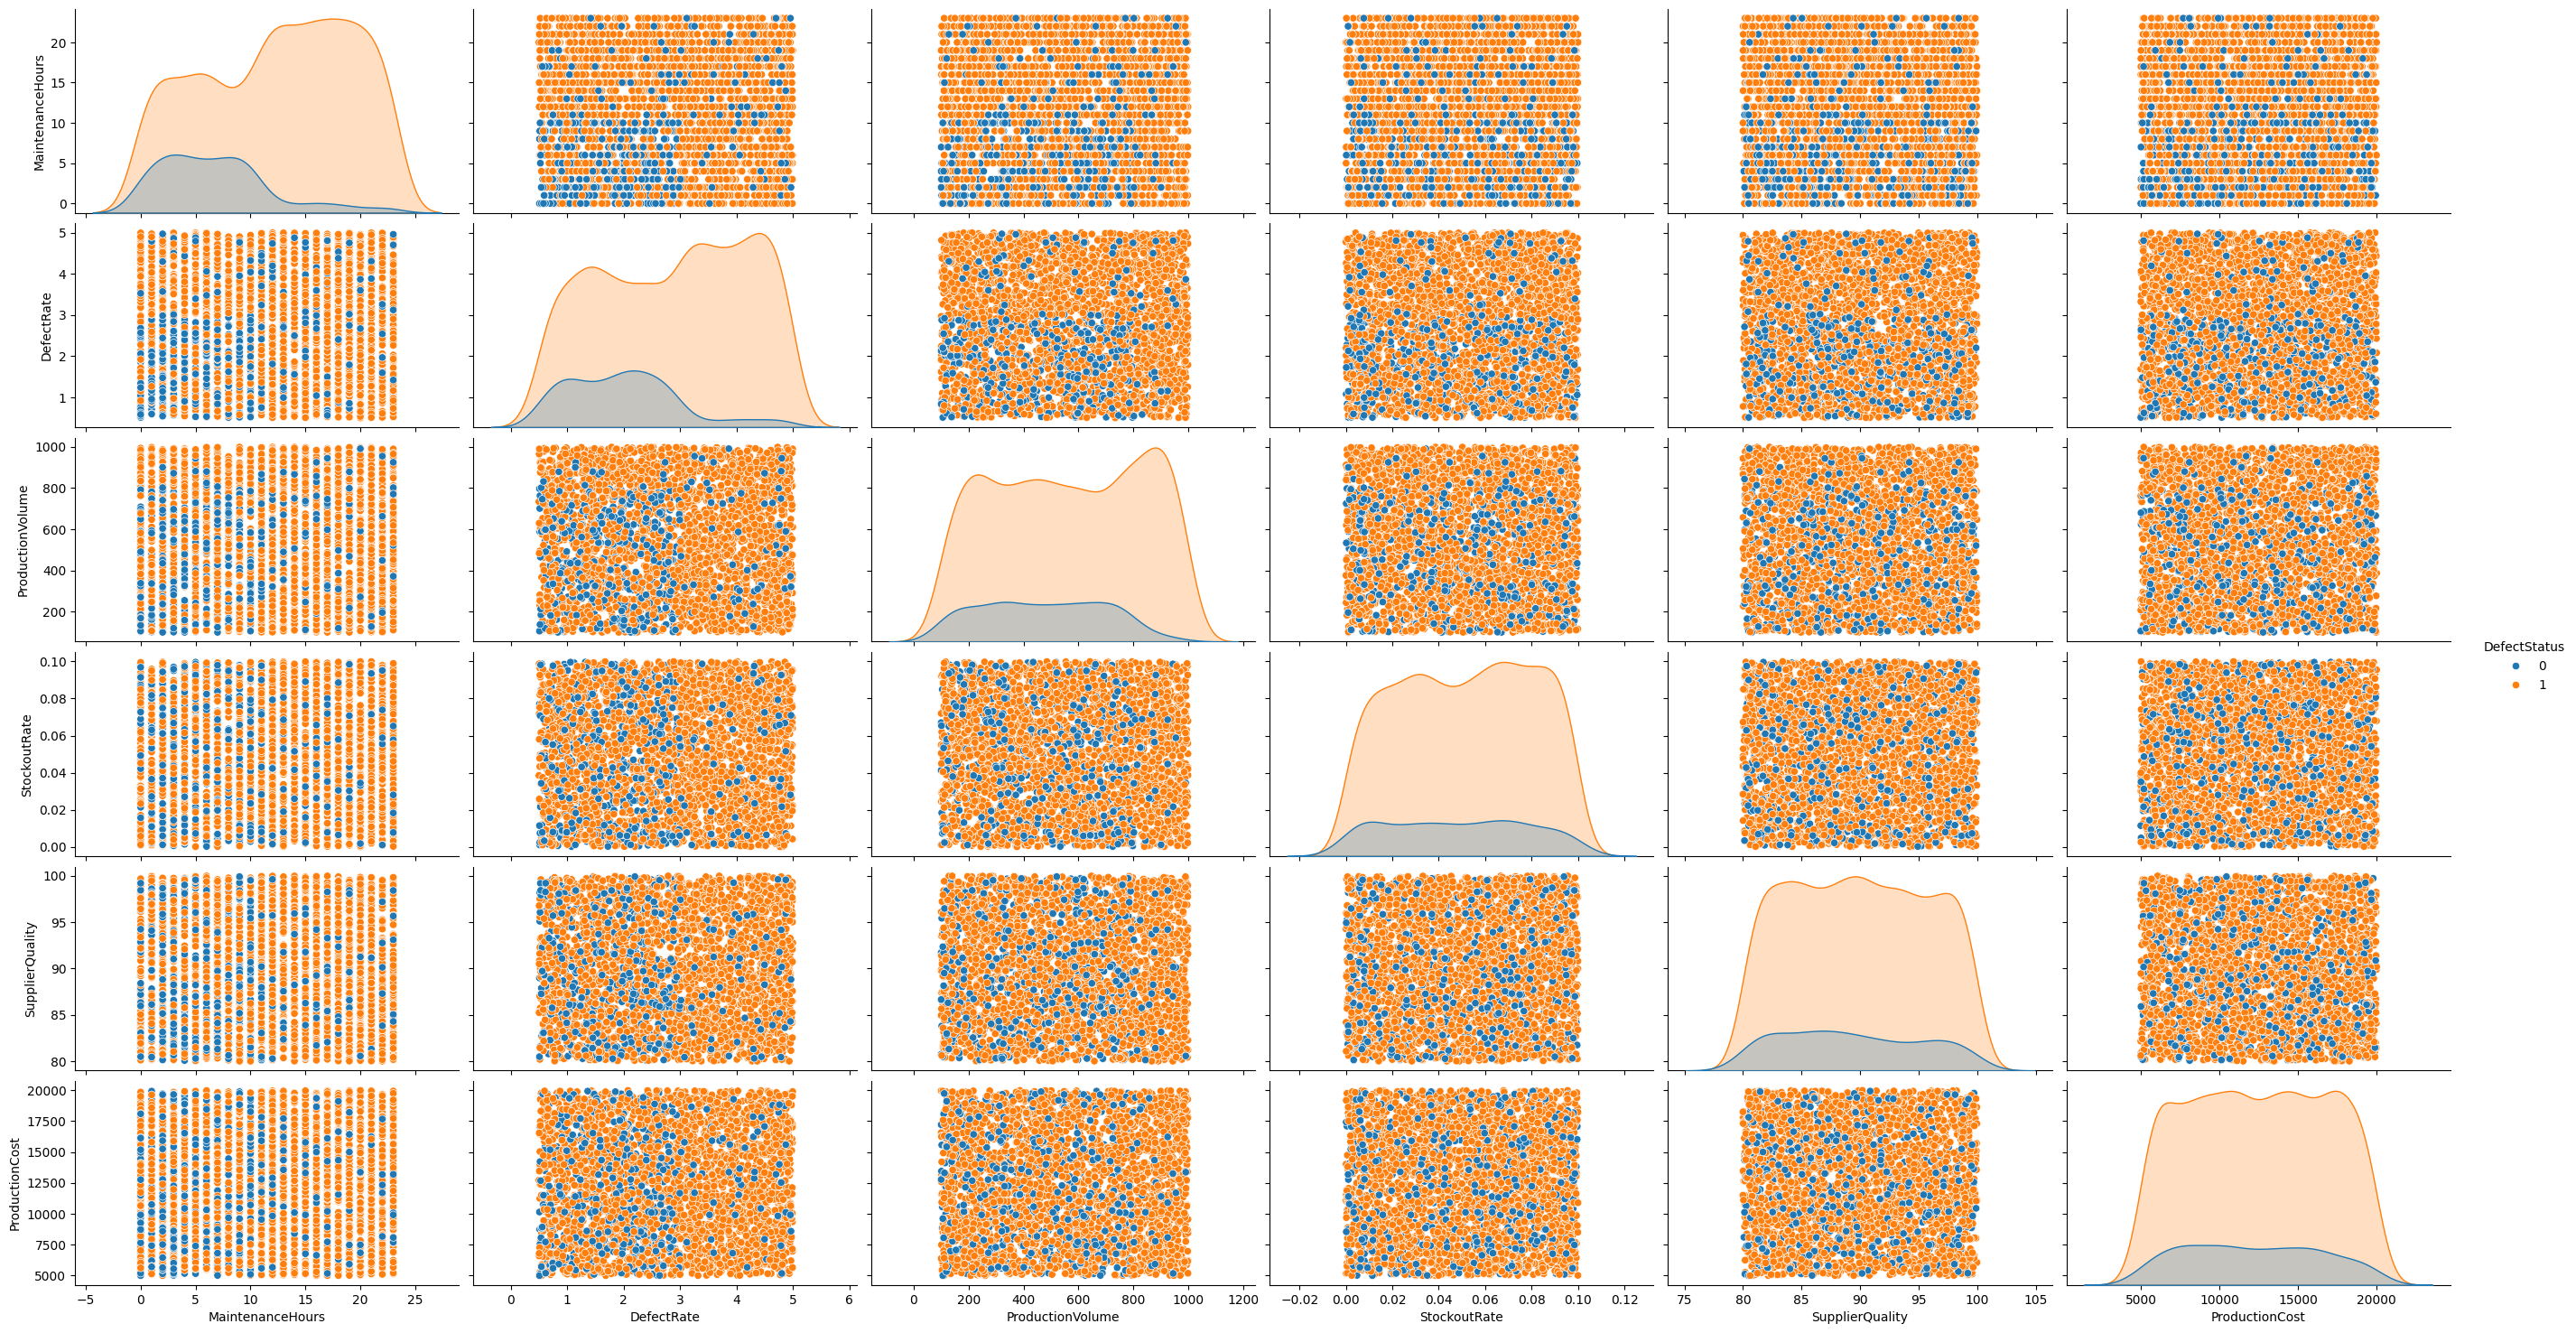

In [26]:
sorted_corr = mf_df.corr()['DefectStatus'].sort_values(ascending=False)
top_indexes = sorted_corr.index[1:7]

sns.pairplot(mf_df, vars=top_indexes, diag_kind="kde", hue="DefectStatus", aspect = 1.85)

Next lets set the random state and begin with the random forest

In [76]:
# Set the random state variable
random_state99 = 999

# extarct the target variable 
X = mf_df.drop('DefectStatus', axis = 1)
y = mf_df['DefectStatus']

# set the scalar
scalars = StandardScaler()
df_scaled = scalars.fit_transform(X)

# Trim off the trainging data
first_splitter = .4
second_splitter = .5
X_train, df_x, y_train, df_y = train_test_split(df_scaled, y, test_size=first_splitter, random_state=1)
cross_x, test_x, cross_y, test_y= train_test_split(df_x, df_y, test_size=second_splitter, random_state=1)

train_samp_list = []
acc_samp_list = []

train_depth_list = []
acc_depth_list = []


In [28]:
# test the lengths of my data
print('the lengths of the total, xtrain, xtest, and cv are:', len(mf_df)
, len(X_train), len(test_x), len(cross_x))
1944 +648 +648

the lengths of the total, xtrain, xtest, and cv are: 3240 1944 648 648


3240

Now lets try out a first shot in the dark at making a random forest. I know to start we need depth and sample split

In [29]:
alpha_forest = RandomForestClassifier(random_state=random_state99, max_depth=20, min_samples_split=300).fit(X_train, y_train)

# Quick accuracy test
y_pred = alpha_forest.predict(test_x)
print(f"accuracy: {accuracy_score(test_y,y_pred):.3f}")

accuracy: 0.850


To begin let's practice with some basic parameter tuning. First we will choose 40 evenly spaced indexes from the minimum amount of acceptable samples (we're choosing 400, though this may be exesive).

First trial run, 400 is definitely excesive. Trimming down to 350 and expanding from div 40 to 

Trial two was not much better. Nothing better happens before 250. 2-250 div 50

Trial 3 has good data. Lets move on to Depth and try that. 

In [30]:
# next find the optimal samples
# this splits up the two ends 2 and 300 up into even chunks
min_splits = np.linspace(2,250, 50).astype(int)
print(min_splits)
for min_s in min_splits:
    rf_model = RandomForestClassifier(min_samples_split=min_s, random_state=random_state99).fit(X_train, y_train)
    rf_preds = rf_model.predict(X_train)
    rf_cross = rf_model.predict(cross_x)
    rf_acc = accuracy_score(y_train, rf_preds)
    rf_acc_cross = accuracy_score(cross_y, rf_cross)
    train_samp_list.append(rf_acc)
    acc_samp_list.append(rf_acc_cross)

[  2   7  12  17  22  27  32  37  42  47  52  57  62  67  72  77  82  88
  93  98 103 108 113 118 123 128 133 138 143 148 153 158 163 169 174 179
 184 189 194 199 204 209 214 219 224 229 234 239 244 250]


In [31]:
print(train_samp_list)
# first trial with a 70 / 15 / 15 split
# [1.0, 0.9616402116402116, 0.9598765432098766, 0.9598765432098766, 0.9598765432098766, 0.9598765432098766, 0.9594356261022927, 0.9598765432098766, 0.9594356261022927, 
# 0.9594356261022927, 0.9594356261022927, 0.9581128747795414, 0.9585537918871252, 0.9581128747795414, 0.9572310405643739, 0.9567901234567902, 0.9567901234567902, 
# 0.9576719576719577, 0.9554673721340388, 0.9554673721340388]


[1.0, 0.970164609053498, 0.9593621399176955, 0.9583333333333334, 0.9588477366255144, 0.9588477366255144, 0.9583333333333334, 0.9578189300411523, 0.9578189300411523, 0.9578189300411523, 0.9578189300411523, 0.9578189300411523, 0.9578189300411523, 0.9578189300411523, 0.9578189300411523, 0.9578189300411523, 0.9578189300411523, 0.9578189300411523, 0.9578189300411523, 0.9578189300411523, 0.9578189300411523, 0.9578189300411523, 0.9578189300411523, 0.9578189300411523, 0.9573045267489712, 0.9573045267489712, 0.9573045267489712, 0.9573045267489712, 0.9573045267489712, 0.9573045267489712, 0.9567901234567902, 0.9567901234567902, 0.9567901234567902, 0.956275720164609, 0.9552469135802469, 0.9552469135802469, 0.9542181069958847, 0.9531893004115226, 0.9526748971193416, 0.9516460905349794, 0.9531893004115226, 0.9526748971193416, 0.9531893004115226, 0.9516460905349794, 0.9531893004115226, 0.9531893004115226, 0.9526748971193416, 0.9506172839506173, 0.9403292181069959, 0.940843621399177]


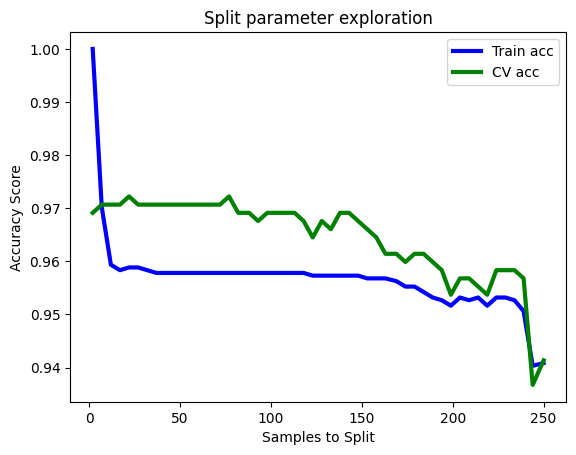

In [32]:
plt.plot(min_splits, train_samp_list, color = 'blue', label = 'Train acc', linewidth = 3)
plt.plot(min_splits, acc_samp_list, color = 'green', label = 'CV acc', linewidth = 3)
plt.xlabel('Samples to Split')
plt.ylabel('Accuracy Score')
plt.title('Split parameter exploration')
plt.legend()

In [33]:
# Moving on to the depth parameter exploration
max_depths = np.linspace(2,20, 20).astype(int)
print(max_depths)
for max_d in max_depths:
    rf_model = RandomForestClassifier(random_state=random_state99, max_depth=max_d).fit(X_train, y_train)
    rf_preds = rf_model.predict(X_train)
    rf_cross = rf_model.predict(cross_x)
    rf_acc = accuracy_score(y_train, rf_preds)
    rf_acc_cross = accuracy_score(cross_y, rf_cross)
    train_depth_list.append(rf_acc)
    acc_depth_list.append(rf_acc_cross)

[ 2  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


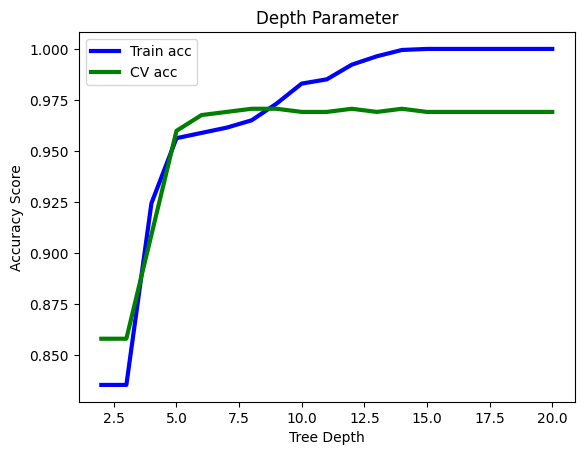

In [34]:
plt.plot(max_depths, train_depth_list, color = 'blue', label = 'Train acc', linewidth = 3)
plt.plot(max_depths, acc_depth_list, color = 'green', label = 'CV acc', linewidth = 3)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Score')
plt.title('Depth Parameter')
plt.legend()

As we can see the depth is well scored in terms of accuracy. 9, 12, 15

Next lets confirm our findings using Grid Search to hypertune our parameters. 

In [35]:
# set up the Parameter dictionary
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [9, 12, 15],
    'min_samples_split': [25, 50, 75],
    'min_samples_leaf': [1, 2, 4]
}

#establish the model
beta_forest_model = RandomForestClassifier(random_state=random_state99, max_depth=max_d, n_estimators=100, min_samples_leaf= 1 , min_samples_split=2).fit(X_train, y_train)

# Establish the Grid
grid=GridSearchCV(estimator=beta_forest_model, param_grid = param_grid, scoring = 'accuracy', cv = 5)

# Now we fit and produce the heatmap
grid_fit = grid.fit(X,y)

grid_best = grid.best_params_
print(grid_best)

{'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 25, 'n_estimators': 100}


With this we can confirm our initial assesments of the top parameters for sample split and max depth. We also now have the best parameters for n estimators and the minimum sample elad size. 

{'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 25, 'n_estimators': 100}



accuracy: 0.954
Number of Features in the mf_df dataset:  17


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'ProductionVolume'),
  Text(1, 0, 'ProductionCost'),
  Text(2, 0, 'SupplierQuality'),
  Text(3, 0, 'DeliveryDelay'),
  Text(4, 0, 'DefectRate'),
  Text(5, 0, 'QualityScore'),
  Text(6, 0, 'MaintenanceHours'),
  Text(7, 0, 'DowntimePercentage'),
  Text(8, 0, 'InventoryTurnover'),
  Text(9, 0, 'StockoutRate'),
  Text(10, 0, 'WorkerProductivity'),
  Text(11, 0, 'SafetyIncidents'),
  Text(12, 0, 'EnergyConsumption'),
  Text(13, 0, 'EnergyEfficiency'),
  Text(14, 0, 'AdditiveProcessTime'),
  Text(15, 0, 'AdditiveMaterialCost')])

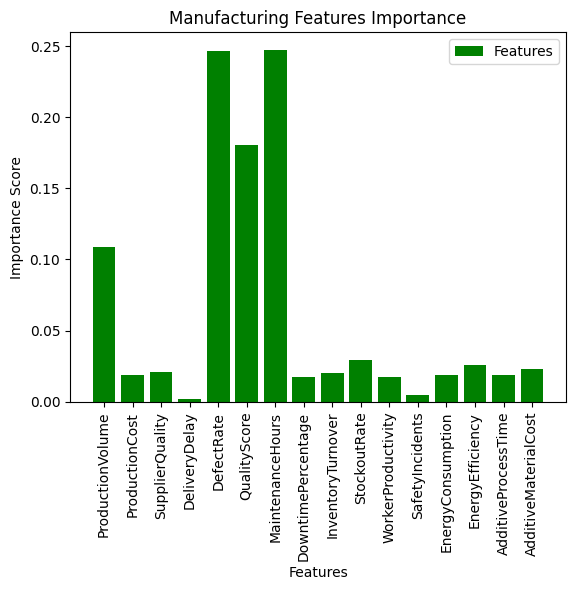

In [57]:
# create the first tuned version
charlie_forest = RandomForestClassifier(random_state= random_state99, max_depth= 12, min_samples_leaf= 1, min_samples_split= 25, n_estimators= 100).fit(X_train, y_train)

# Quick accuracy test
y_pred = charlie_forest.predict(test_x)
print(f"accuracy: {accuracy_score(test_y,y_pred):.3f}")

print("Number of Features in the mf_df dataset: ", mf_df.shape[1])

charlie_features = charlie_forest.feature_importances_
charlie_names = X.columns

plt.bar(charlie_names, charlie_features, color = 'green', label = 'Features')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Manufacturing Features Importance')
plt.legend()
plt.xticks(rotation = 90)

The feature importance tool with random forests proved what we had discovered earlier on our top features. 

Next we test out our new Beta random forest. It came out with a pretty amazing accuracy score already. However since it was already planned to work in an XGBoost lets keep moving forward. 

Now the next logical thing we want to do is move on to feature selection. Researching Random Forests and feature selection I came across article describing Recursive Feature Elemination. This library utilizes XGBoosts build in feature importance to eliminate the one with he lowest score, however this also considers the combines set of features every iteration ensuring we are capturing the complex way they interact with each other. Given there are 17 features I believe this is the more efficient path. 

In [77]:
# make the XGB model
xgb_model = xgb.XGBClassifier(random_state=100, n_estimators = 250, learning_rate = 0.2)

# Define a range of n_features_to_select to experiment with
n_features_to_select_range = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

# Dict to store results
results = {}

for n_features_to_select in n_features_to_select_range:
    # Create the RFE object
    rfe = RFE(estimator=xgb_model, n_features_to_select=n_features_to_select)

    rfe.fit(X_train, y_train)

    # print out the chosen features
    selected_features = rfe.support_
    selected_feature_names = X.columns[selected_features]
    print(f"Selected Features for {n_features_to_select} features: {list(selected_feature_names)}")

    # trim for the first test
    X_train_selected = rfe.transform(X_train)
    X_cv_selected = rfe.transform(cross_x)
    X_test_selected = rfe.transform(test_x)

    # train the final model on the selected features
    xgb_model.fit(X_train_selected, y_train)

    # Evaluate the model on the test set
    y_pred = xgb_model.predict(X_test_selected)
    accuracy = accuracy_score(test_y, y_pred)
    print(f"Accuracy for {n_features_to_select} features: {accuracy:.3f}")

    results[n_features_to_select] = accuracy

# Print the best number of features based on the highest accuracy
best_n_features = max(results, key=results.get)
print(f"Best number of features: {best_n_features} with accuracy: {results[best_n_features]:.3f}")

Selected Features for 7 features: ['ProductionVolume', 'SupplierQuality', 'DefectRate', 'QualityScore', 'MaintenanceHours', 'EnergyEfficiency', 'AdditiveMaterialCost']
Accuracy for 7 features: 0.954
Selected Features for 8 features: ['ProductionVolume', 'SupplierQuality', 'DefectRate', 'QualityScore', 'MaintenanceHours', 'WorkerProductivity', 'EnergyEfficiency', 'AdditiveMaterialCost']
Accuracy for 8 features: 0.952
Selected Features for 9 features: ['ProductionVolume', 'SupplierQuality', 'DefectRate', 'QualityScore', 'MaintenanceHours', 'WorkerProductivity', 'EnergyConsumption', 'EnergyEfficiency', 'AdditiveMaterialCost']
Accuracy for 9 features: 0.957
Selected Features for 10 features: ['ProductionVolume', 'ProductionCost', 'SupplierQuality', 'DefectRate', 'QualityScore', 'MaintenanceHours', 'WorkerProductivity', 'EnergyConsumption', 'EnergyEfficiency', 'AdditiveMaterialCost']
Accuracy for 10 features: 0.958
Selected Features for 11 features: ['ProductionVolume', 'ProductionCost', 'S

C:\Users\micha\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=17 > n_features=16. There will be no feature selection and all features will be kept.
  warnings.warn(


Selected Features for 17 features: ['ProductionVolume', 'ProductionCost', 'SupplierQuality', 'DeliveryDelay', 'DefectRate', 'QualityScore', 'MaintenanceHours', 'DowntimePercentage', 'InventoryTurnover', 'StockoutRate', 'WorkerProductivity', 'SafetyIncidents', 'EnergyConsumption', 'EnergyEfficiency', 'AdditiveProcessTime', 'AdditiveMaterialCost']
Accuracy for 17 features: 0.957
Best number of features: 10 with accuracy: 0.958


As we can see above the 10 features created the best accuracy results. This involved utilizing features: 

ProductionVolume', 'ProductionCost', 'SupplierQuality', 'DefectRate', 'QualityScore', 'MaintenanceHours', 'WorkerProductivity', 'EnergyConsumption', 'EnergyEfficiency', 'AdditiveMaterialCost'


Accuracy for 10 features: 0.958

This is a very positive result, showing the model can accurately predict high and low defects. Data like this allows manufacturing planner and operations teams to successfully tune their operations to find the perfect harmony and achieve a storng production rate with low defects. 

As a bonus I wanted to run the data set through a simple gretel operation to see if we can generate new synthetic data to test the model on and see how it performs. This new data was created under the same variable parameters as the first and utilized a section of the original dataset to train the new. 

First we will upload the new sythetic dataset creation log for inspection. 
Then we will split in similar fashion to our plan above.


In [83]:
# Upload the new data
sf_df = pd.read_csv('Synthetic_data_Gretel.csv')

mf_df.describe()


ProductionVolume  ProductionCost  SupplierQuality  DeliveryDelay  \
count       3240.000000     3240.000000      3240.000000    3240.000000   
mean         548.523148    12423.018476        89.833290       2.558951   
std          262.402073     4308.051904         5.759143       1.705804   
min          100.000000     5000.174521        80.004820       0.000000   
25%          322.000000     8728.829280        84.869219       1.000000   
50%          549.000000    12405.204656        89.704861       3.000000   
75%          775.250000    16124.462428        94.789936       4.000000   
max          999.000000    19993.365549        99.989214       5.000000   

        DefectRate  QualityScore  MaintenanceHours  DowntimePercentage  \
count  3240.000000   3240.000000       3240.000000         3240.000000   
mean      2.749116     80.134272         11.476543            2.501373   
std       1.310154     11.611750          6.872684            1.443684   
min       0.500710     60.010098          0.000000            0.001665   
25%       1.598033     70.103420          5.750000            1.264597   
50%       2.708775     80.265312         12.000000            2.465151   
75%       3.904533     90.353822         17.000000            3.774861   
max       4.998529     99.996993         23.000000            4.997591   

       InventoryTurnover  StockoutRate  WorkerProductivity  SafetyIncidents  \
count        3240.000000   3240.000000         3240.000000      3240.000000   
mean            6.019662      0.050878           90.040115         4.591667   
std             2.329791      0.028797            5.723600         2.896313   
min             2.001611      0.000002           80.004960         0.000000   
25%             3.983249      0.026200           85.180203         2.000000   
50%             6.022389      0.051837           90.125743         5.000000   
75%             8.050222      0.075473           95.050838         7.000000   
max             9.998577      0.099997           99.996786         9.000000   

       EnergyConsumption  EnergyEfficiency  AdditiveProcessTime  \
count        3240.000000       3240.000000          3240.000000   
mean         2988.494453          0.299776             5.472098   
std          1153.420820          0.116400             2.598212   
min          1000.720156          0.100238             1.000151   
25%          1988.140273          0.200502             3.228507   
50%          2996.822301          0.297470             5.437134   
75%          3984.788299          0.402659             7.741006   
max          4997.074741          0.499500             9.999749   

       AdditiveMaterialCost  DefectStatus  
count           3240.000000   3240.000000  
mean             299.515479      0.840432  
std              116.379905      0.366261  
min              100.211137      0.000000  
25%              194.922058      1.000000  
50%              299.728918      1.000000  
75%              403.178283      1.000000  
max              499.982782      1.000000

In [82]:
sf_df.describe()

ProductionVolume  ProductionCost  SupplierQuality  DeliveryDelay  \
count       1000.000000     1000.000000      1000.000000    1000.000000   
mean         835.519000    15897.825176        95.563473       2.368000   
std          364.090983     4876.364815         5.170818       1.513561   
min          100.000000     4940.800000        76.000000       0.000000   
25%          694.000000    15124.614197        93.000000       1.000000   
50%          939.000000    16570.445062        96.350000       2.000000   
75%         1049.250000    18200.000000        98.765432       4.000000   
max         2127.000000    41180.000000       126.400000       5.000000   

        DefectRate  QualityScore  MaintenanceHours  DowntimePercentage  \
count  1000.000000   1000.000000       1000.000000         1000.000000   
mean      2.904546     92.917268         18.808000            2.228881   
std       1.332185      8.502515          9.491007            2.176112   
min       0.500000     60.000000          0.000000            0.000000   
25%       2.121212     89.000000         15.000000            0.500000   
50%       2.800000     95.959596         19.000000            2.000000   
75%       3.400000     98.500000         22.000000            3.000000   
max      10.200000    120.500000         66.000000           13.500000   

       InventoryTurnover  StockoutRate  WorkerProductivity  SafetyIncidents  \
count        1000.000000   1000.000000         1000.000000      1000.000000   
mean            8.336757      4.866649           96.185655        10.640000   
std             3.057907      5.223614            6.721494         7.837335   
min             2.000000      0.000000           67.000000         0.000000   
25%             6.708204      0.020000           93.000000         7.000000   
50%             8.442641      3.000000           98.000000         9.000000   
75%             9.500000      9.000000          100.000000        12.000000   
max            21.000000     21.000000          128.000000        57.000000   

       EnergyConsumption  EnergyEfficiency  AdditiveProcessTime  \
count        1000.000000       1000.000000          1000.000000   
mean         4132.519622          0.369587             9.030708   
std          1658.847342          0.173547             4.250677   
min          1000.000000          0.000000             1.000000   
25%          3200.000000          0.256456             7.000000   
50%          4300.000000          0.350000             8.575061   
75%          4900.000000          0.454545            10.101010   
max         10900.000000          1.140000            32.500000   

       AdditiveMaterialCost  DefectStatus  
count           1000.000000   1000.000000  
mean             419.150542      0.182000  
std              161.377850      0.386038  
min              100.000000      0.000000  
25%              301.195322      0.000000  
50%              419.945062      0.000000  
75%              490.000000      0.000000  
max             1000.000000      1.000000

In [70]:
# extarct the target variable 
sX = sf_df.drop('DefectStatus', axis = 1)
sy = sf_df['DefectStatus']

# set the scalar
sscalars = StandardScaler()
sdf_scaled = sscalars.fit_transform(sX)

# Trim off the trainging data
first_splitter = .4
second_splitter = .5
sX_train, sdf_x, sy_train, sdf_y = train_test_split(sdf_scaled, sy, test_size=first_splitter, random_state=random_state99)
scross_x, stest_x, scross_y, stest_y= train_test_split(sdf_x, sdf_y, test_size=second_splitter, random_state=random_state99)




In [78]:
# make the XGB model
xgb_model = xgb.XGBClassifier(random_state=100, n_estimators = 250, learning_rate = 0.2)

# Define a range of n_features_to_select to experiment with
n_features_to_select_range = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

# Dict to store results
results = {}

for n_features_to_select in n_features_to_select_range:
    # Create the RFE object
    rfe = RFE(estimator=xgb_model, n_features_to_select=n_features_to_select)

    rfe.fit(sX_train, sy_train)

    # print out the chosen features
    selected_features = rfe.support_
    selected_feature_names = sX.columns[selected_features]
    print(f"Selected Features for {n_features_to_select} features: {list(selected_feature_names)}")

    # trim for the first test
    sX_train_selected = rfe.transform(sX_train)
    sX_cv_selected = rfe.transform(scross_x)
    sX_test_selected = rfe.transform(stest_x)

    # train the final model on the selected features
    xgb_model.fit(sX_train_selected, sy_train)

    # Evaluate the model on the test set
    sy_pred = xgb_model.predict(sX_test_selected)
    accuracy = accuracy_score(stest_y, sy_pred)
    print(f"Accuracy for {n_features_to_select} features: {accuracy:.3f}")

    results[n_features_to_select] = accuracy

# Print the best number of features based on the highest accuracy
best_n_features = max(results, key=results.get)
print(f"Best number of features: {best_n_features} with accuracy: {results[best_n_features]:.3f}")

Selected Features for 7 features: ['DefectRate', 'DowntimePercentage', 'InventoryTurnover', 'StockoutRate', 'WorkerProductivity', 'SafetyIncidents', 'AdditiveMaterialCost']
Accuracy for 7 features: 0.935
Selected Features for 8 features: ['DefectRate', 'DowntimePercentage', 'InventoryTurnover', 'StockoutRate', 'WorkerProductivity', 'SafetyIncidents', 'AdditiveProcessTime', 'AdditiveMaterialCost']
Accuracy for 8 features: 0.925
Selected Features for 9 features: ['DefectRate', 'DowntimePercentage', 'InventoryTurnover', 'StockoutRate', 'WorkerProductivity', 'SafetyIncidents', 'EnergyEfficiency', 'AdditiveProcessTime', 'AdditiveMaterialCost']
Accuracy for 9 features: 0.920
Selected Features for 10 features: ['ProductionCost', 'DefectRate', 'DowntimePercentage', 'InventoryTurnover', 'StockoutRate', 'WorkerProductivity', 'SafetyIncidents', 'EnergyEfficiency', 'AdditiveProcessTime', 'AdditiveMaterialCost']
Accuracy for 10 features: 0.935
Selected Features for 11 features: ['ProductionCost', '

C:\Users\micha\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=17 > n_features=16. There will be no feature selection and all features will be kept.
  warnings.warn(


After uploading the data and running it through the model we see we still have a great score. 12-15 scored the best, which in the interest of our over arching goals would promote a study and collect more data to see if those features really do make any impact. 

In conclusion I believe the comobination of Machine Learning models and the power tools they contain we were able to demonstrate noto only the power of influence they potentially have in the manufacturing environment but also the power of synthetic data to bolster our research methods and computer / data science applications. 

References

Dataset - https://www.kaggle.com/datasets/rabieelkharoua/predicting-manufacturing-defects-dataset?resource=download
    License - Attribution 4.0 International (CC BY 4.0)

refernce data science for python book

reference the class onine textbook

Reference the elements of statistical learning

Feature exploration
https://medium.com/dsc-polimi-journal/machine-learning-with-google-colab-73e74cfe8ea2

XGBoost with RFE 
https://xgboosting.com/xgboost-feature-selection-with-rfe/
https://stackoverflow.com/questions/66308956/how-to-use-rfe-with-xgboost-booster


Gretel Prompt:
{"prompt":"Use the below features and the variable descriptions / data type / ranges to produce synthetic data. The purpose of this data is to simulate a manufacturing environment and let us attempt to predict defects. \n\nProduction Metrics\nProductionVolume: Number of units produced per day.\n\nData Type: Integer.\nRange: 100 to 1000 units/day.\nProductionCost: Cost incurred for production per day.\n\nData Type: Float.\nRange: $5000 to $20000.\nSupply Chain and Logistics\nSupplierQuality: Quality ratings of suppliers.\n\nData Type: Float (%).\nRange: 80% to 100%.\nDeliveryDelay: Average delay in delivery.\n\nData Type: Integer (days).\nRange: 0 to 5 days.\nQuality Control and Defect Rates\nDefectRate: Defects per thousand units produced.\n\nData Type: Float.\nRange: 0.5 to 5.0 defects.\nQualityScore: Overall quality assessment.\n\nData Type: Float (%).\nRange: 60% to 100%.\nMaintenance and Downtime\nMaintenanceHours: Hours spent on maintenance per week.\n\nData Type: Integer.\nRange: 0 to 24 hours.\nDowntimePercentage: Percentage of production downtime.\n\nData Type: Float (%).\nRange: 0% to 5%.\nInventory Management\nInventoryTurnover: Ratio of inventory turnover.\n\nData Type: Float.\nRange: 2 to 10.\nStockoutRate: Rate of inventory stockouts.\n\nData Type: Float (%).\nRange: 0% to 10%.\nWorkforce Productivity and Safety\nWorkerProductivity: Productivity level of the workforce.\n\nData Type: Float (%).\nRange: 80% to 100%.\nSafetyIncidents: Number of safety incidents per month.\n\nData Type: Integer.\nRange: 0 to 10 incidents.\nEnergy Consumption and Efficiency\nEnergyConsumption: Energy consumed in kWh.\n\nData Type: Float.\nRange: 1000 to 5000 kWh.\nEnergyEfficiency: Efficiency factor of energy usage.\n\nData Type: Float.\nRange: 0.1 to 0.5.\nAdditive Manufacturing\nAdditiveProcessTime: Time taken for additive manufacturing.\n\nData Type: Float (hours).\nRange: 1 to 10 hours.\nAdditiveMaterialCost: Cost of additive materials per unit.\n\nData Type: Float ($).\nRange: $100 to $500.\nTarget Variable\nDefectStatus: Predicted defect status.\n\nData Type: Binary (0 for Low Defects, 1 for High Defects).\n\n<sample-data>\nProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus\r\n819,18123.219,98.123,3,2.567,83.421,20,4.321,7.654,0.089,95.123,5,4219.012,0.421,6.789,269.123,1\r\n351,5937.654,92.567,1,1.234,98.765,18,2.345,8.901,0.067,96.789,8,1890.123,0.456,4.321,219.012,0\r\n923,14567.89,85.123,4,3.901,76.543,22,1.234,9.876,0.098,94.567,1,3412.345,0.321,7.654,391.234,1\r\n467,6198.765,90.123,2,2.345,92.345,15,3.456,7.654,0.067,95.123,6,2678.901,0.456,5.678,245.678,1\r\n135,14321.234,88.901,0,1.234,85.123,12,2.345,8.901,0.098,94.567,9,3124.567,0.321,3.456,219.012,0\r\n819,18123.219,98.123,3,2.567,83.421,20,4.321,7.654,0.089,95.123,5,4219.012,0.421,6.789,269.123,1\r\n351,5937.654,92.567,1,1.234,98.765,18,2.345,8.901,0.067,96.789,8,1890.123,0.456,4.321,219.012,0\r\n923,14567.89,85.123,4,3.901,76.543,22,1.234,9.876,0.098,94.567,1,3412.345,0.321,7.654,391.234,1\r\n467,6198.765,90.123,2,2.345,92.345,15,3.456,7.654,0.067,95.123,6,2678.901,0.456,5.678,245.678,1\r\n135,14321.234,88.901,0,1.234,85.123,12,2.345,8.901,0.098,94.567,9,3124.567,0.321,3.456,219.012,0\r\n819,18123.219,98.123,3,2.567,83.421,20,4.321,7.654,0.089,95.123,5,4219.012,0.421,6.789,269.123,1\r\n351,5937.654,92.567,1,1.234,98.765,18,2.345,8.901,0.067,96.789,8,1890.123,0.456,4.321,219.012,0\r\n421,17563.219,89.012,2,2.901,91.234,19,3.456,9.876,0.098,94.567,7,3912.345,0.321,6.789,269.123,1\r\n819,18123.219,98.123,3,2.567,83.421,20,4.321,7.654,0.089,95.123,5,4219.012,0.421,6.789,269.123,1\r\n467,6198.765,90.123,2,2.345,92.345,15,3.456,7.654,0.067,95.123,6,2678.901,0.456,5.678,245.678,1\r\n135,14321.234,88.901,0,1.234,85.123,12,2.345,8.901,0.098,94.567,9,3124.567,0.321,3.456,219.012,0\r\n923,14567.89,85.123,4,3.901,76.543,22,1.234,9.876,0.098,94.567,1,3412.345,0.321,7.654,391.234,1\r\n351,5937.654,92.567,1,1.234,98.765,18,2.345,8.901,0.067,96.789,8,1890.123,0.456,4.321,219.012,0\r\n819,18123.219,98.123,3,2.567,83.421,20,4.321,7.654,0.089,95.123,5,4219.012,0.421,6.789,269.123,1\r\n467,6198.765,90.123,2,2.345,92.345,15,3.456,7.654,0.067,95.123,6,2678.901,0.456,5.678,245.678,1\r\n135,14321.234,88.901,0,1.234,85.123,12,2.345,8.901,0.098,94.567,9,3124.567,0.321,3.456,219.012,0\r\n923,14567.89,85.123,4,3.901,76.543,22,1.234,9.876,0.098,94.567,1,3412.345,0.321,7.654,391.234,1\r\n351,5937.654,92.567,1,1.234,98.765,18,2.345,8.901,0.067,96.789,8,1890.123,0.456,4.321,219.012,0\r\n819,18123.219,98.123,3,2.567,83.421,20,4.321,7.654,0.089,95.123,5,4219.012,0.421,6.789,269.123,1\r\n913,17321.5,96.789,2,3.901,81.234,19,3.456,8.901,0.098,96.789,7,3912.345,0.321,8.901,391.234,1\r\n467,6198.765,90.123,2,2.345,92.345,15,3.456,7.654,0.067,95.123,6,2678.901,0.456,5.678,245.678,1\r\n135,14321.234,88.901,0,1.234,85.123,12,2.345,8.901,0.098,94.567,9,3124.567,0.321,3.456,219.012,0\r\n923,14567.89,85.123,4,3.901,76.543,22,1.234,9.876,0.098,94.567,1,3412.345,0.321,7.654,391.234,1\r\n351,5937.654,92.567,1,1.234,98.765,18,2.345,8.901,0.067,96.789,8,1890.123,0.456,4.321,219.012,0\r\n819,18123.219,98.123,3,2.567,83.421,20,4.321,7.654,0.089,95.123,5,4219.012,0.421,6.789,269.123,1\r\n913,17321.5,96.789,2,3.901,81.234,19,3.456,8.901,0.098,96.789,7,3912.345,0.321,8.901,391.234,1\r\n467,6198.765,90.123,2,2.345,92.345,15,3.456,7.654,0.067,95.123,6,2678.901,0.456,5.678,245.678,1\r\n135,14321.234,88.901,0,1.234,85.123,12,2.345,8.901,0.098,94.567,9,3124.567,0.321,3.456,219.012,0\r\n923,14567.89,85.123,4,3.901,76.543,22,1.234,9.876,0.098,94.567,1,3412.345,0.321,7.654,391.234,1\r\n351,5937.654,92.567,1,1.234,98.765,18,2.345,8.901,0.067,96.789,8,1890.123,0.456,4.321,219.012,0\r\n819,18123.219,98.123,3,2.567,83.421,20,4.321,7.654,0.089,95.123,5,4219.012,0.421,6.789,269.123,1\n</sample-data>"}